<a href="https://colab.research.google.com/github/sdave-connexion/Hierarical-sales-forecsting/blob/main/6months_Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ID-2, 30 months training data and 6 months (last 2021) test data

In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# PREDICTING FUTURE Traffic using Holt Winters






(30, 1)
            Sales
Date             
2019-01-01  21505
2019-02-01  19438
2019-03-01  21423
2019-04-01  19049
2019-05-01  19604


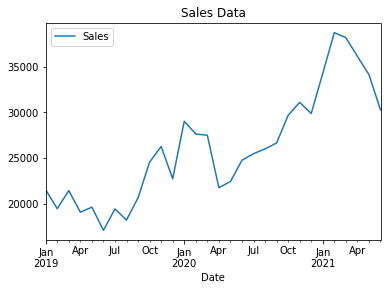

In [2]:
df = pd.read_csv('/content/train_6months.csv',index_col='Date', parse_dates=True)
# finding shape of the dataframe
print(df.shape)
# having a look at the data
print(df.head())
# plotting the original data
df[['Sales']].plot(title='Sales Data')

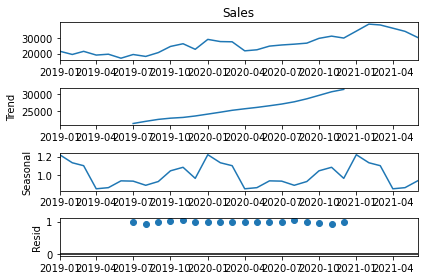

In [3]:
decompose_result = seasonal_decompose(df['Sales'],model='multiplicative',period=12)
decompose_result.plot();

In [4]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
w = 12
alpha = 1/(2*w)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


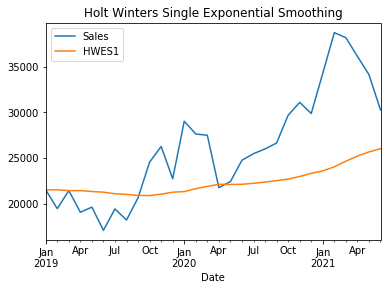

In [5]:
df['HWES1'] = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['Sales','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


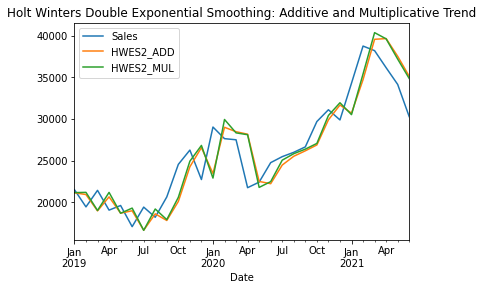

In [6]:
df['HWES2_ADD'] = ExponentialSmoothing(df['Sales'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Sales'],trend='mul').fit().fittedvalues
df[['Sales','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


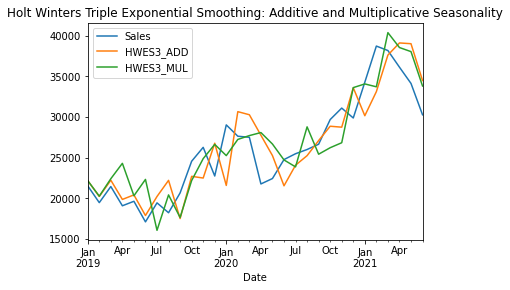

In [7]:
df['HWES3_ADD'] = ExponentialSmoothing(df['Sales'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['Sales'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
df[['Sales','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [8]:
forecast_data = pd.read_csv('/content/test_6months.csv',index_col='Date',parse_dates=True)
forecast_data.index.freq = 'MS'

# Split into train and test set
train_df = df
test_df = forecast_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

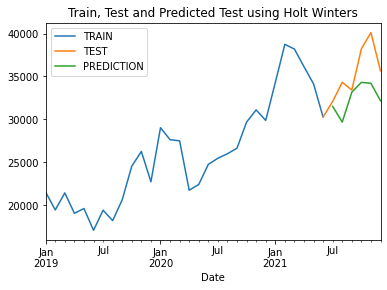

In [14]:
fitted_model = ExponentialSmoothing(train_df['Sales'],trend='add',seasonal='add',seasonal_periods=8).fit()
test_predictions = fitted_model.forecast(6)
train_df['Sales'].plot(legend=True,label='TRAIN')
test_df['Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

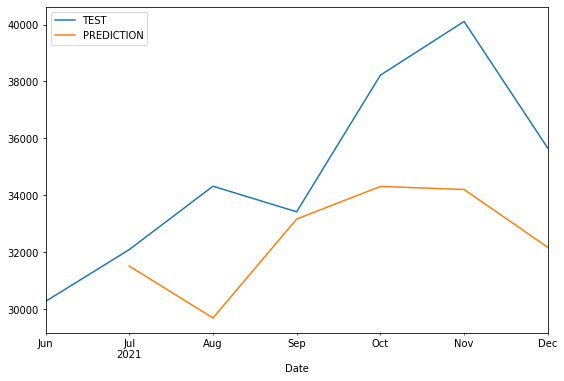

In [15]:
test_df['Sales'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION');

In [16]:
df_forecast = pd.DataFrame(test_predictions)
df_forecast.columns =['Sales']
df_forecast['Date'] = df_forecast.index
df_forecast

,Sales,Date
2021-07-01,31511.496212,2021-07-01
2021-08-01,29687.467578,2021-08-01
2021-09-01,33164.893409,2021-09-01
2021-10-01,34310.360779,2021-10-01
2021-11-01,34203.659820,2021-11-01
2021-12-01,32171.010170,2021-12-01


In [17]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals()) 
query = ''' select test_df.Date , test_df.Sales , df_forecast.Sales as forecast_sales, ABS((df_forecast.Sales-test_df.Sales)/test_df.Sales)*100 as diff
from test_df
inner join df_forecast on test_df.Date=df_forecast.Date
group by test_df.Date''' 
mysql(query)

,Date,Sales,forecast_sales,diff
0,2021-07-01 00:00:00.000000,32092,31511.496212,1.808874
1,2021-08-01 00:00:00.000000,34319,29687.467578,13.495534
2,2021-09-01 00:00:00.000000,33420,33164.893409,0.763335
3,2021-10-01 00:00:00.000000,38221,34310.360779,10.231651
4,2021-11-01 00:00:00.000000,40110,34203.659820,14.725356
5,2021-12-01 00:00:00.000000,35656,32171.010170,9.773923
